In [56]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [57]:
# log1 = json.load(open("log_panda_scale0g.json", "r"))
# log2 = json.load(open("log_panda_scale430g.json", "r"))

# log1 = json.load(open("log_panda_mass0g.json", "r"))
# log2 = json.load(open("log_panda_mass500g.json", "r"))

# log1 = json.load(open("log_panda_mass0g_pose2.json", "r"))
# log2 = json.load(open("log_panda_mass500g_pose2.json", "r"))

# log1 = json.load(open("log_panda_mass0g_pose3.json", "r"))
# log2 = json.load(open("log_panda_mass500g_pose3.json", "r"))

experiment = "cartesian_velocity"
settings = ("0g", "500g")

# experiment = "force_control"
# settings = ("0.2kg", "0.3kg")

log1 = json.load(open(f"logs/log_panda_{experiment}_{settings[0]}.json", "r"))
log2 = json.load(open(f"logs/log_panda_{experiment}_{settings[1]}.json", "r"))

In [58]:
np.array(log1['EE_T_K'][0]).reshape((4,4))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [59]:
def visualize(name, title, label,
              log=log1, show_legend=True):
    plt.grid()
    for i in range(len(log[name][0])):
        data = np.array(log[name]) #- np.array(null[name])
        plt.plot(log["time"], data[:,i],
                 label=f"{label} [{i}]")

    if show_legend:
        plt.legend(loc=(1.05, 0.))
    plt.xlabel("Time [s]")
    plt.title(title)
def visualize2(name, title, label):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    visualize(name, f"{title} ({settings[0]})", label, log1, show_legend=False)
    plt.subplot(122)
    visualize(name, f"{title} ({settings[1]})", label, log2)
    plt.tight_layout()
    import pathlib
    pathlib.Path(f"plots/{experiment}").mkdir(parents=True, exist_ok=True)
    plt.savefig(f"plots/{experiment}/{name}.png", dpi=400)

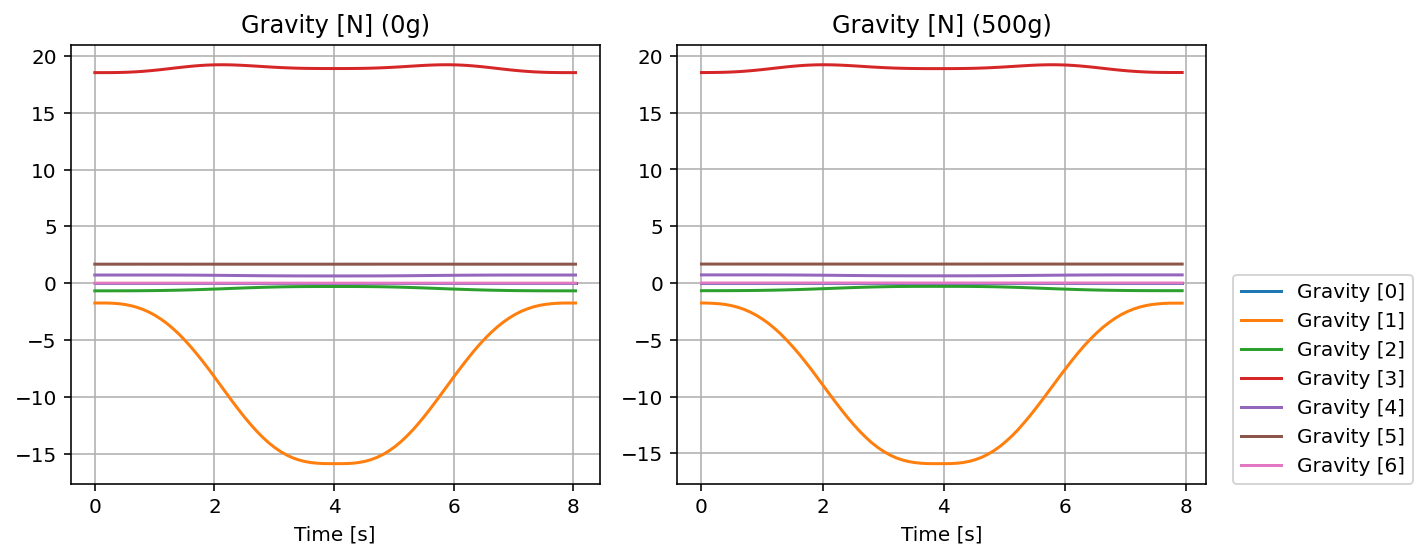

In [60]:
visualize2("gravity",
          "Gravity [N]",
          "Gravity")

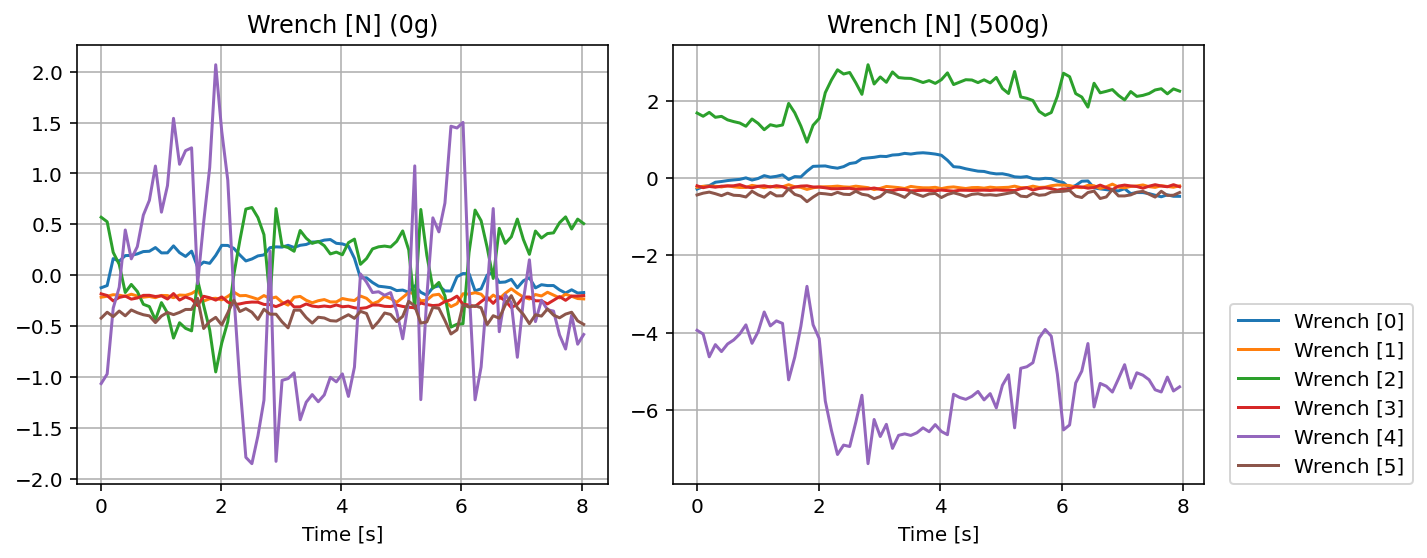

In [61]:
visualize2("wrench", "Wrench [N]", "Wrench")

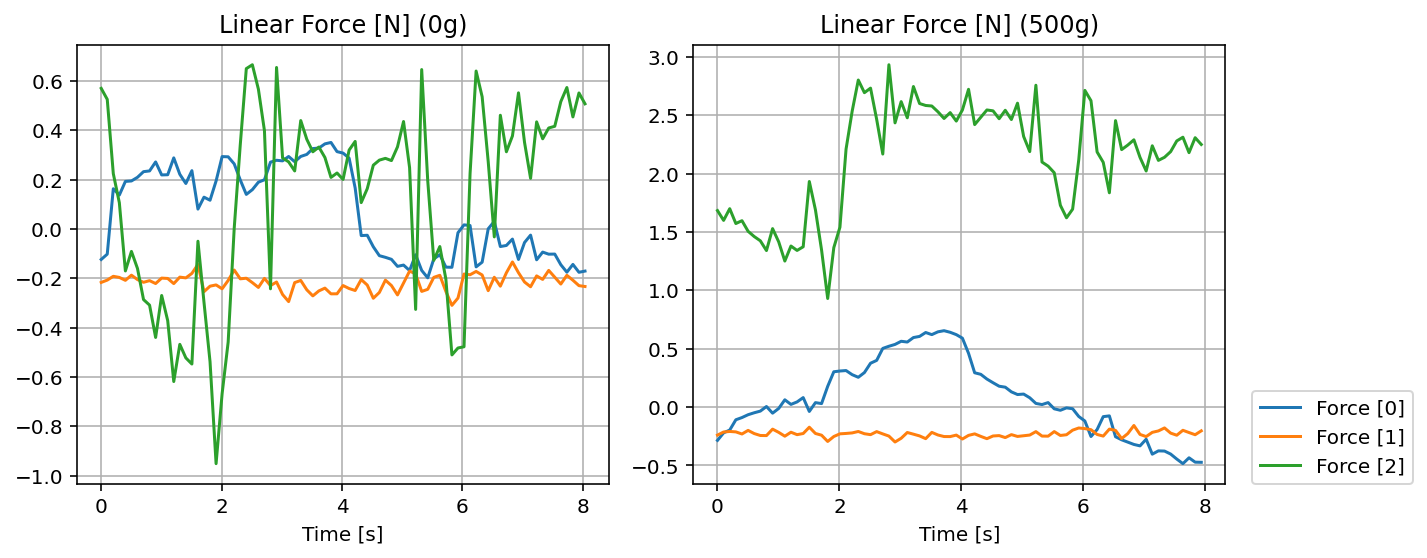

In [62]:
visualize2("force", "Linear Force [N]", "Force")

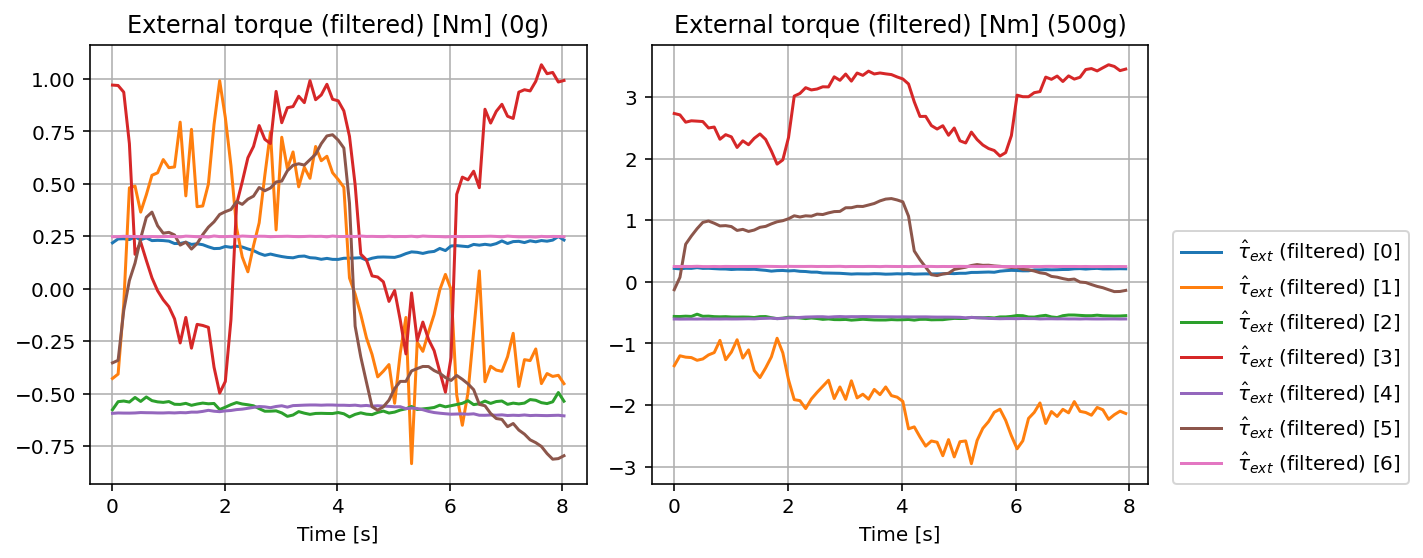

In [63]:
visualize2("tau_ext_hat_filtered",
          "External torque (filtered) [Nm]",
          "$\\hat{\\tau}_{ext}$ (filtered)")

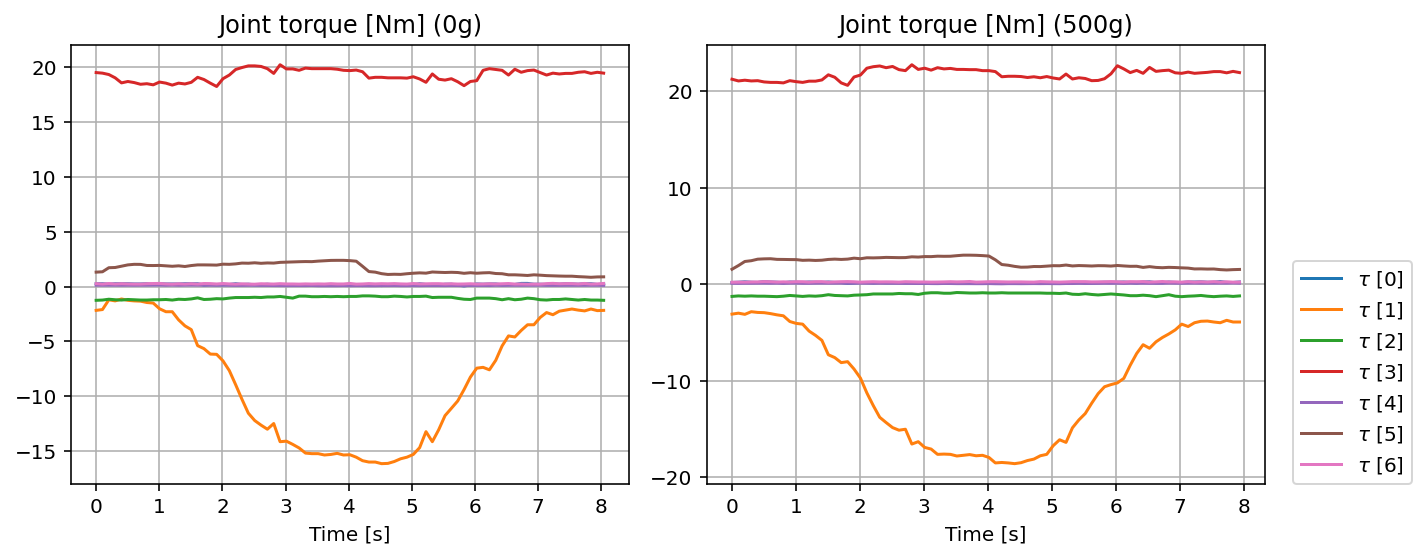

In [64]:
visualize2("tau",
          "Joint torque [Nm]",
          "$\\tau$")

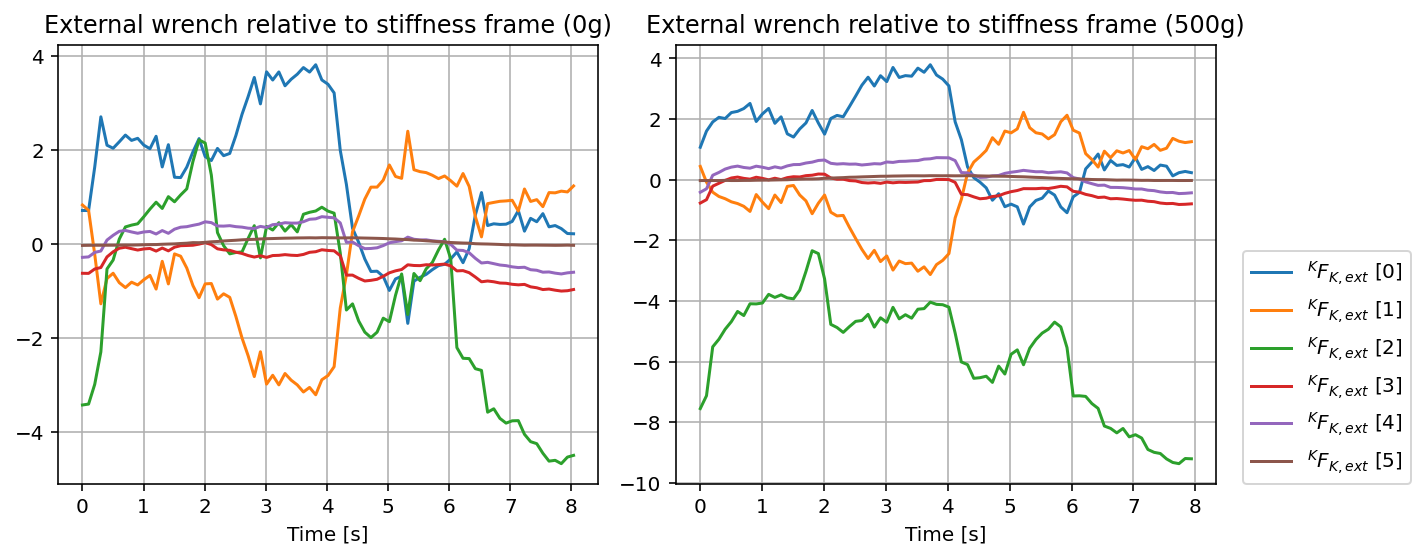

In [65]:
visualize2("K_F_ext_hat_K",
          "External wrench relative to stiffness frame",
          "$^{K}F_{K,ext}$")

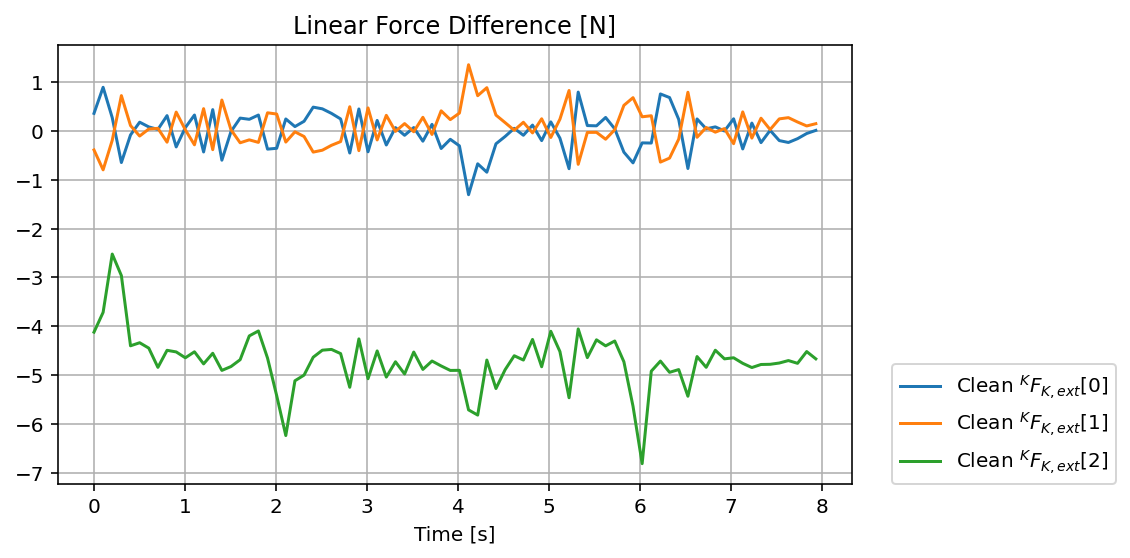

In [66]:
plt.figure(figsize=(8,4))
plt.title("Linear Force Difference [N]")
plt.xlabel("Time [s]")
plt.grid()
for i in range(3):
    f1 = np.array(log1["K_F_ext_hat_K"])[:,i]
    f2 = np.array(log2["K_F_ext_hat_K"])[:,i]
    plt.plot(log1["time"][:80], f2[:80]-f1[:80], label='Clean $^{K}F_{K,ext}$[%i]' % i)
plt.legend(loc=(1.05,0.0));
plt.tight_layout()
plt.savefig(f"plots/{experiment}/force_difference.png", dpi=400)

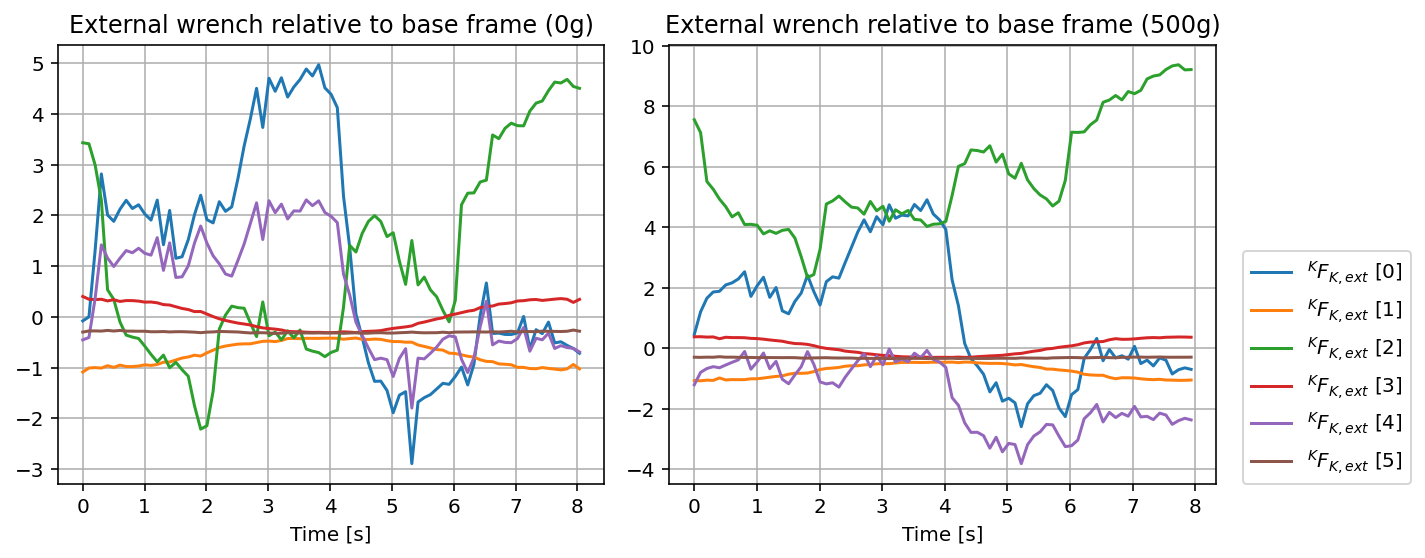

In [67]:
visualize2("O_F_ext_hat_K",
          "External wrench relative to base frame",
          "$^{K}F_{K,ext}$")